# Taller sobre LDA y kNN

## Introducción
En este taller, exploraremos dos de los algoritmos más utilizados en Machine Learning: K-Nearest Neighbors (KNN) y K-Means. Estos métodos, aunque diferentes en su propósito, comparten el uso de métricas de distancia para clasificar o agrupar datos.

KNN (K-Nearest Neighbors) es un algoritmo de clasificación basado en la similitud entre los datos. Su desempeño depende del número de vecinos (k) y del tipo de distancia utilizada.
K-Means es un algoritmo de agrupamiento no supervisado que busca particionar un conjunto de datos en k grupos, minimizando la variación dentro de cada grupo.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Definir nombres de las columnas
columnas = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Cargar el dataset
df = pd.read_csv("iris.data", names=columnas)

# Mostrar las primeras filas
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:


# Cargar el dataset
columnas = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv("iris.data", names=columnas)

# Convertir la columna de clases a valores numéricos
df["species"] = df["species"].astype("category").cat.codes  

# Separar características (X) y etiquetas (y)
X = df.iloc[:, :-1]  # Todas las columnas excepto la última
y = df.iloc[:, -1]   # La última columna (clase de la flor)

# Dividir los datos en entrenamiento (60%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Mostrar tamaños de los conjuntos
print(f"Tamaño de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño de prueba: {X_test.shape[0]} muestras")


Tamaño de entrenamiento: 105 muestras
Tamaño de prueba: 45 muestras


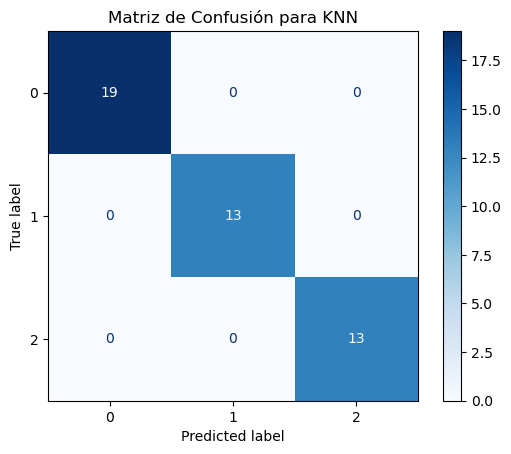

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [6]:
# Convertir la columna de clases a valores numéricos
df["species"] = df["species"].astype("category").cat.codes  

# Separar características (X) y etiquetas (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Dividir los datos en entrenamiento (60%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Normalizar los datos (KNN es sensible a escalas)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo KNN con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Evaluar con matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para KNN")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Análisis del Desempeño del Modelo KNN

Los resultados obtenidos en el reporte de clasificación indican que el modelo KNN ha alcanzado una precisión perfecta en la clasificación del dataset Iris. A continuación, se analiza cada métrica y su significado:

## 1. Precisión, Recall y F1-score  

| Clase        | Precisión | Recall | F1-score | Soporte |
|-------------|-----------|--------|----------|---------|
| 0 (Setosa)  | 1.00      | 1.00   | 1.00     | 19      |
| 1 (Versicolor) | 1.00   | 1.00   | 1.00     | 13      |
| 2 (Virginica) | 1.00   | 1.00   | 1.00     | 13      |

- **Precisión:** Indica cuántas de las predicciones de cada clase fueron correctas. En este caso, todas las predicciones fueron correctas (100%).  
- **Recall:** Mide cuántos de los ejemplos reales de cada clase fueron correctamente identificados. Como el recall es 1.00 para todas las clases, significa que ningún ejemplo fue mal clasificado.  
- **F1-score:** Es la media armónica entre precisión y recall. Como ambos valores son perfectos, el F1-score también es 1.00.  

## 2. Exactitud (Accuracy)  

La exactitud del modelo es **100%**, lo que significa que todas las muestras de prueba se clasificaron correctamente.  

## 3. Análisis del resultado  

Un desempeño del 100% en todas las métricas sugiere que el modelo está **sobreajustado** a los datos. Esto puede deberse a:  

- El dataset Iris es relativamente simple y sus clases están bien separadas en el espacio de características.  
- El número de vecinos (\( k = 5 \)) puede ser adecuado, ya que en este caso los datos están bien distribuidos.  
- No hay ruido en los datos, lo que facilita la clasificación.  
- El conjunto de prueba (30%) aún mantiene la misma distribución de clases, lo que facilita que el modelo generalice sin errores.  

## 4. Posibles mejoras o pruebas adicionales  

Aunque estos resultados son excelentes, en problemas del mundo real se pueden considerar algunas pruebas adicionales para evaluar la estabilidad del modelo:  

- **Cambiar \( k \) y evaluar el impacto:** Se puede probar con valores menores o mayores de \( k \) para ver si los resultados cambian.  
- **Probar con otro dataset más complejo:** Iris es un dataset "limpio", pero en datos más ruidosos o con clases menos separables, KNN puede no ser perfecto.  
- **Evaluar con validación cruzada:** En lugar de una única partición 60-30, se puede usar `cross_val_score` para obtener un mejor análisis de la estabilidad del modelo.  
